### RNN ----（案例二）股票预测  ( n-1 )

![这是一个示例图片](rnn.jpg)

## x[8个数据] ， y[1个数据] 通过前八个预测第九个，以此类推。 --ht[与x数据对应]

In [38]:
# 读取数据文件

import pandas as pd
import numpy as np
from torch import nn

#--------------------------
data = pd.read_csv('zgpa_train.csv')
# data.head()
#---------------------------
price = data.loc[:,'close']
#price.head()
#------------------------------
#归一化
price_norm = price-min(price)/max(price)-min(price)
# print(price_norm)

可视化

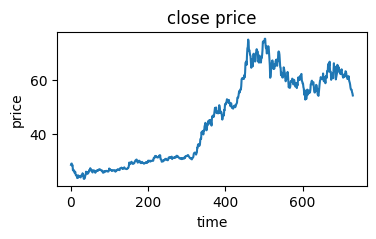

In [39]:
from matplotlib import pyplot as plt
# -------------------------------------- 画图(股票价格)
fig = plt.figure(figsize=(4, 2))
plt.plot(price)
plt.title('close price')
plt.xlabel('time')
plt.ylabel('price')
plt.show()

定义数据

In [40]:
def extract_data(data, time_step):
    X = []
    # Y = []
    for i in range(len(data)-time_step):
        X.append([a for a in data[i:i+time_step]])
        # Y.append(data[i+time_step])
    X = np.array(X)
    # Y = np.array(Y)
    X = X.reshape(X.shape[0], X.shape[1], 1)
    return X

In [41]:
X= extract_data(price_norm, 9)
print(X[0])

[[4.77451192]
 [5.22451192]
 [5.25451192]
 [4.49451192]
 [4.66451192]
 [2.75451192]
 [2.93451192]
 [2.71451192]
 [2.71451192]]


In [42]:
import torch
# ----------------------------------------------------------数据集
class Dataset(torch.utils.data.Dataset):
    def __len__(self):
        return len(X)
    def __getitem__(self,i):
        x = torch.from_numpy(X[i][0:8]).float()
        y = torch.from_numpy(X[i][8]).float()
        # y = torch.from_numpy(y).float()
        # y = y.reshape(y.shape[0])
        return x,y
        
dataset = Dataset()
print(len(dataset))
print(dataset[0][0].shape)
print(dataset[0][1])
print(dataset[0][1].shape)

722
torch.Size([8, 1])
tensor([2.7145])
torch.Size([1])


In [43]:
#-----------------------------------------------------------------数据集加载
loader = torch.utils.data.DataLoader(
    dataset = dataset,
    batch_size = 8,
    shuffle = False,    # 打乱顺序
    drop_last = True    # 不能被批处理整除时，最后一个丢弃
)

#### input_size = 1
#### output_size = 1
#### hidden_size = 100
#### sqe_len = 8
#### batch_size = 8

In [44]:
#### 

In [45]:
from torch import nn
#------------------------------------------------------------------定义网络
class RNN(nn.Module):
    def __init__(self,input_size,hidden_size,output_size):
        super(RNN, self).__init__()
        self.rnn = nn.RNN(input_size =input_size,
                          hidden_size =hidden_size,
                          num_layers =1,
                          # batch_first =True # [bitch_size, seq, h]
                          )
        self.fc = nn.Linear(hidden_size,output_size)
    def forward(self,x):
        h0 = torch.zeros(1,8,100)   # [num_layer,batch_size,hidden_size]
        out,hn = self.rnn(x,h0)
        out = out = self.fc(out[:,-1,:])
        return out
#---------------------------------------------------------------
rnn = RNN(input_size=1,hidden_size=100, output_size=1) 


In [46]:
#------------------------------------------------------------------训练
input_size = 1             # 输入特征数量
hidden_size = 100           # 隐藏层神经单元数量
output_size = 1            # 输出层神经单元数量
batch_size = 8             # 批处理大小
num_layer = 1              # RNN层数 
out_list = []
losses  = []
#--------------------------------------------------------------------
optimizer = torch.optim.Adam(rnn.parameters(),lr=0.001)        #  优化器
loss_fn = nn.MSELoss()                                         #  损失函数
#---------------------------------------------------------------------
def train():
    
    print('|Epoch|'+"-------------"+'|loss|'+"-------------"+'acc')
    print("-------------------------------------------------------")
    for epoch in range(100):
        for i,(x, y) in enumerate(loader):
            out= rnn(x)
            loss = loss_fn(out,y)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            if epoch == 99:
                out_list.append(out)
        acc = (out == y).sum().item()/len(dataset)
        losses.append(loss.item())
        
        print('|'+str(epoch)+'|'+"---------"'|'+str(loss.item())+'|'+"---------"'|'+str(acc)+'|')
    print("-------------------------------------------------------\n")
    # print(outs)

#---------------------------------------------------------------------    
train()

|Epoch|-------------|loss|-------------acc
-------------------------------------------------------
|0|---------|368.4691162109375|---------|0.0|
|1|---------|200.127685546875|---------|0.0|
|2|---------|94.8821792602539|---------|0.0|
|3|---------|39.487754821777344|---------|0.0|
|4|---------|12.9785737991333|---------|0.0|
|5|---------|3.2543933391571045|---------|0.0|
|6|---------|2.5479788780212402|---------|0.0|
|7|---------|5.710490703582764|---------|0.0|
|8|---------|9.710893630981445|---------|0.0|
|9|---------|13.534531593322754|---------|0.0|
|10|---------|8.841350555419922|---------|0.0|
|11|---------|7.982178688049316|---------|0.0|
|12|---------|5.775628089904785|---------|0.0|
|13|---------|3.195385456085205|---------|0.0|
|14|---------|5.063302040100098|---------|0.0|
|15|---------|4.907422065734863|---------|0.0|
|16|---------|6.783296585083008|---------|0.0|
|17|---------|3.5092620849609375|---------|0.0|
|18|---------|1.86388099193573|---------|0.0|
|19|---------|1.5

In [47]:
print(losses)

[368.4691162109375, 200.127685546875, 94.8821792602539, 39.487754821777344, 12.9785737991333, 3.2543933391571045, 2.5479788780212402, 5.710490703582764, 9.710893630981445, 13.534531593322754, 8.841350555419922, 7.982178688049316, 5.775628089904785, 3.195385456085205, 5.063302040100098, 4.907422065734863, 6.783296585083008, 3.5092620849609375, 1.86388099193573, 1.5051463842391968, 1.456701397895813, 1.0072078704833984, 0.9202977418899536, 0.8914105892181396, 0.9600576758384705, 1.1078664064407349, 1.5436615943908691, 1.934208869934082, 2.260793447494507, 2.4826672077178955, 2.7655792236328125, 2.9657371044158936, 3.2148172855377197, 3.0607030391693115, 2.6210858821868896, 2.1956496238708496, 2.0286426544189453, 1.1163238286972046, 3.5592057704925537, 1.434819221496582, 2.317277431488037, 1.0352604389190674, 4.069348335266113, 1.3789056539535522, 3.106180429458618, 2.6529626846313477, 3.244811773300171, 2.01103138923645, 2.455314874649048, 2.7726006507873535, 3.386608839035034, 4.1874346

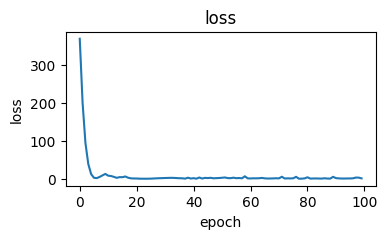

In [48]:
# -------------------------------------- 画图（损失函数）
fig = plt.figure(figsize=(4, 2))
plt.plot(losses)
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 预测

In [52]:
out_list = [t.detach().numpy() for t in out_list]
result = np.stack(out_list)

AttributeError: 'numpy.ndarray' object has no attribute 'detach'

In [55]:
print(type(result))

<class 'numpy.ndarray'>


In [57]:
y_p = np.ravel(result)
print(y_p)

[ 2.3520598   3.877205    3.133595    2.973679    3.7573779   2.5791123
  1.8863299   2.412705   -0.9065035   0.6134757   1.5085526   1.5858481
  2.5658813   1.755765    2.1685054   1.9316692  -2.0935593   0.734177
  1.3841244   2.3235369   2.120093    1.7809191   2.0095725   3.5601304
 -0.46352363  1.5092018   0.5990863   1.1127353   0.78256845  1.3271701
  2.7343407   2.793005    1.482518    2.4931383   2.8770175   2.901283
  2.043579    2.4601953   2.9614346   3.259064    2.434703    3.3947957
  3.3575785   4.1300106   3.3874314   3.0434232   2.9385345   3.5221949
  1.2828583   2.2235026   3.0740633   2.7584546   2.8270094   3.006041
  2.8588552   2.2997575   0.7278376   2.0669818   2.2368217   2.687471
  2.8135583   2.7247427   2.6111894   2.8566544   2.5086412   3.1344743
  2.9946964   2.6329982   2.797462    2.810923    2.9055295   2.6581883
  2.014667    2.6080306   2.3568506   1.4920865   1.2324717   1.8099102
  2.0889685   2.548872    1.6939628   2.113604    1.8193531   1.9566

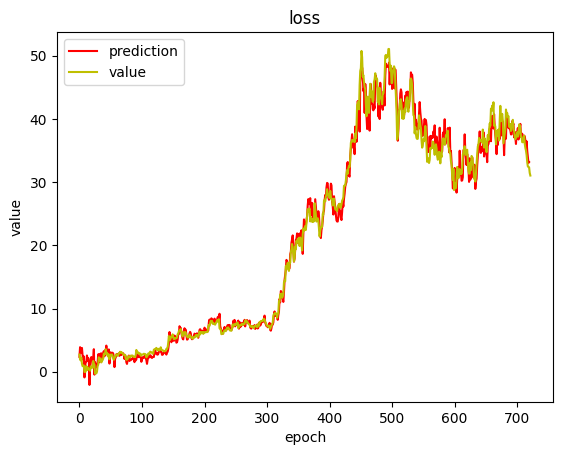

In [66]:
fig1 = plt.figure()
plt.plot(y_p, color='red',label='prediction')
plt.plot(X[:,-1],'y',label='value')
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('value')
plt.legend(loc='upper left')
plt.show()